https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [1]:
!pip install statsmodels==0.14.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 36.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression



os.environ["OMP_NUM_THREADS"] = '1'


In [3]:
data = pd.read_csv ("/work/20240910-122433/car data.csv").copy()
df = pd.DataFrame(data).copy()


df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


## Kollar efter Nulls och Dublicates

In [4]:
print(df.isnull().sum())
df.describe()
df.drop_duplicates()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# One hot encodar rader med text

In [5]:
df_encoded = df

df_encoded= df_encoded.drop("Car_Name", axis=1)

#Encodar 
df_encoded = df_encoded.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}})

df_encoded = df_encoded.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}})

df_encoded = df_encoded.replace({'Transmission': {'Manual': 0, 'Automatic': 1}})

df_encoded.head(500)


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,0,0
297,2015,4.00,5.90,60000,0,0,0,0
298,2009,3.35,11.00,87934,0,0,0,0
299,2017,11.50,12.50,9000,1,0,0,0


# Kollar normalfördelning

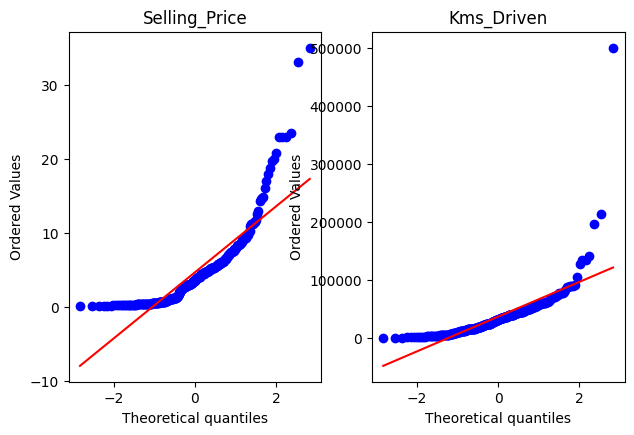

In [6]:
columns_qq = df_encoded[['Selling_Price','Kms_Driven']].copy()

plt.figure(figsize=(15, 10))
plotnr = 1

for column in columns_qq:
    plt.subplot(2, 4, plotnr)
    stats.probplot(df_encoded[column], dist="norm", plot=plt)
    plt.title(f'{column}')
    plotnr+=1

# Tar bort outlier 

In [7]:
# Calculate Q1, Q3, and IQR for each column
Q1 = df_encoded.quantile(0.25)
Q3 = df_encoded.quantile(0.75)
IQR = Q3 - Q1

# Create a mask to identify outliers
mask = pd.DataFrame(True, index=df.index, columns=df.columns)

for col in df_encoded.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    
    # Update the mask for values within the bounds
    mask[col] = (df_encoded[col] >= lower_bound) & (df_encoded[col] <= upper_bound)

# Remove rows containing outliers
df_cleaned = df_encoded[mask.all(axis=1)]

# Display cleaned data
print("Data after removing outliers:")
print(df_cleaned)


Data after removing outliers:
     Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0    2014           3.35           5.59       27000          0            0   
2    2017           7.25           9.85        6900          0            0   
3    2011           2.85           4.15        5200          0            0   
6    2015           6.75           8.12       18796          0            0   
10   2017           2.85           3.60        2135          0            0   
..    ...            ...            ...         ...        ...          ...   
293  2010           3.25           9.90       38000          0            0   
294  2014           3.75           6.80       33019          0            0   
297  2015           4.00           5.90       60000          0            0   
298  2009           3.35          11.00       87934          0            0   
300  2016           5.30           5.90        5464          0            0   

     Transmission  Ow

# Kollar normalfördelning efter borttagning av outlier

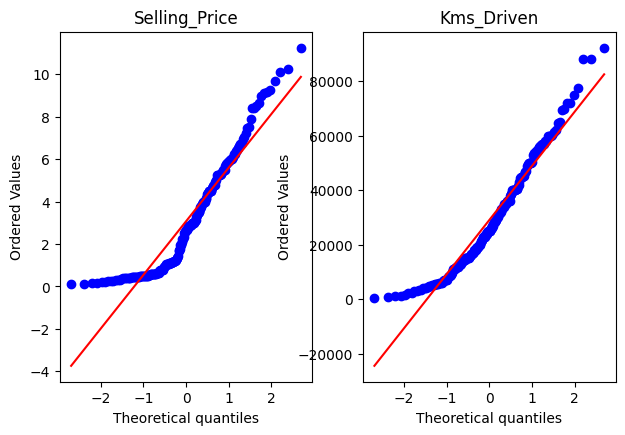

In [8]:
columns_qq2 = df_cleaned[['Selling_Price', 'Kms_Driven']].copy()

plt.figure(figsize=(15, 10))
plotnr = 1

for column in columns_qq2:
    plt.subplot(2, 4, plotnr)
    stats.probplot(df_cleaned[column], dist="norm", plot=plt)
    plt.title(f'{column}')
    plotnr+=1

# KnnClassfier

In [9]:
#Gör bins som ska vara cap till vilka labels de tillhör.
bins = [0, 3, 6, 8, 11, np.inf]  # Adjust ranges based on your data
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']


#Gör en ny column som skall kategorisera selling price
df_cleaned['Price_Category'] = pd.cut(df_cleaned['Selling_Price'], bins=bins, labels=labels)

#Väljer alla features som ska användas, vi valde alla 
X = df_cleaned[["Year", "Present_Price", "Kms_Driven", "Fuel_Type", "Seller_Type", "Transmission", "Owner"]]

df_to_scale = X

#Skala datan
scaler = StandardScaler()
df_to_scale = scaler.fit_transform(df_to_scale)

#Väljer target
y = df_cleaned["Price_Category"]

# Splittar dataset till test och train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize datat
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

#Gör en förutsägelse
y_pred = knn_classifier.predict(X_test_scaled)

#printar Resulltat
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")




Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.75      0.86         4
         Low       0.73      0.79      0.76        14
      Medium       0.50      0.50      0.50         6
    Very Low       0.97      0.97      0.97        35

    accuracy                           0.86        59
   macro avg       0.80      0.75      0.77        59
weighted avg       0.87      0.86      0.87        59

Confusion Matrix:
 [[ 3  0  1  0]
 [ 0 11  2  1]
 [ 0  3  3  0]
 [ 0  1  0 34]]
Accuracy: 0.86


# Försöker få fram den optimala K värdet

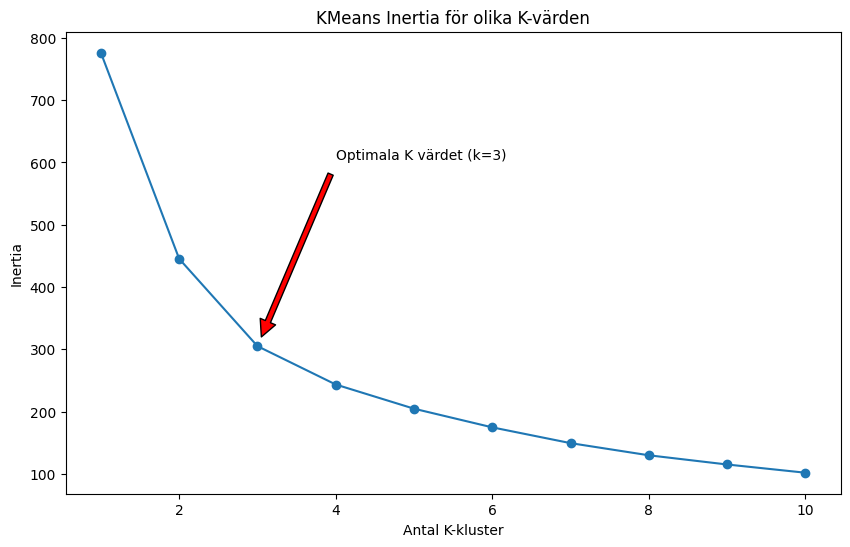

In [10]:

lista = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=5)
    kmeans.fit(df_to_scale)
    lista.append(kmeans.inertia_)

# Plot for KMeans Inertia
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), lista, marker="o")
plt.xlabel('Antal K-kluster')
plt.ylabel('Inertia')
plt.title('KMeans Inertia för olika K-värden')




optimal_k = 3  
plt.annotate(f"Optimala K värdet (k={optimal_k})", xy=(optimal_k, lista[optimal_k - 1]), 
             xytext=(optimal_k + 1, lista[optimal_k - 1] + 300), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

# Testar Istället Knn som regressor 

In [11]:
X = df_cleaned[["Year", "Present_Price", "Kms_Driven", "Fuel_Type", "Seller_Type", "Transmission", "Owner"]]
y = df_cleaned["Selling_Price"]

#Splittar dtatat i test och train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Scalar datat inna anvädning 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definerer modellen oc väljer optimal k 
knn_regressor = KNeighborsRegressor(n_neighbors=4)

# Tränar modellen
knn_regressor.fit(X_train_scaled, y_train)

# Gör en förutsägelse
y_pred = knn_regressor.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

#Jämnför resultatet med vår prediction score
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(10))

Mean Squared Error (MSE): 0.35
R-squared (R²): 0.95
     Actual  Predicted
220    3.50     4.3750
31     2.35     2.7875
254    5.25     4.9625
158    0.48     0.9450
129    0.78     1.3125
249    5.25     6.4750
116    1.10     0.4375
28     1.95     2.7000
180    0.30     0.6000
176    0.35     0.4150


# Testar även LinjärReggression 

                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.349
Model:                            OLS   Adj. R-squared (uncentered):              0.329
Method:                 Least Squares   F-statistic:                              17.53
Date:                Fri, 13 Sep 2024   Prob (F-statistic):                    1.52e-11
Time:                        08:55:14   Log-Likelihood:                         -353.53
No. Observations:                 135   AIC:                                      715.1
Df Residuals:                     131   BIC:                                      726.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

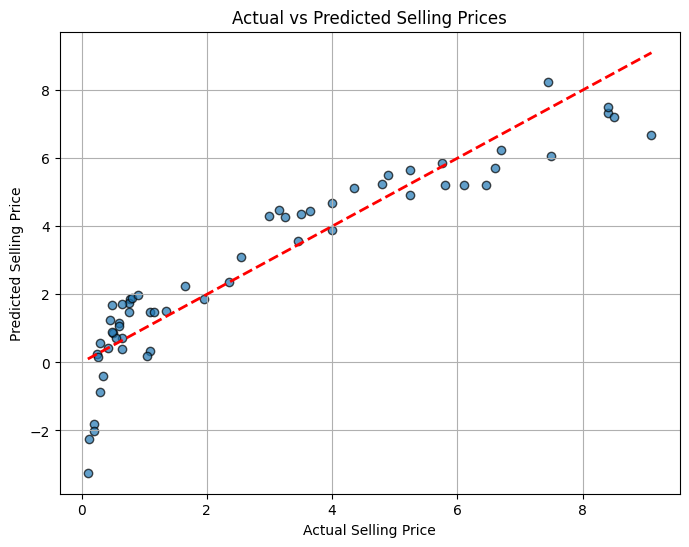

In [12]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Definerer modellen
linear_regressor = LinearRegression()

#Använder modellen på train
linear_regressor.fit(X_train_scaled, y_train)


#Definerer modellen
model = sm.OLS(y_train, X_train_scaled).fit()
print(model.summary())


#Förutsäger med test data i modellen
y_pred = linear_regressor.predict(X_test_scaled)


#Information om evaluering
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


#Printar ut information
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.title('Actual vs Predicted Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid(True)
plt.show()



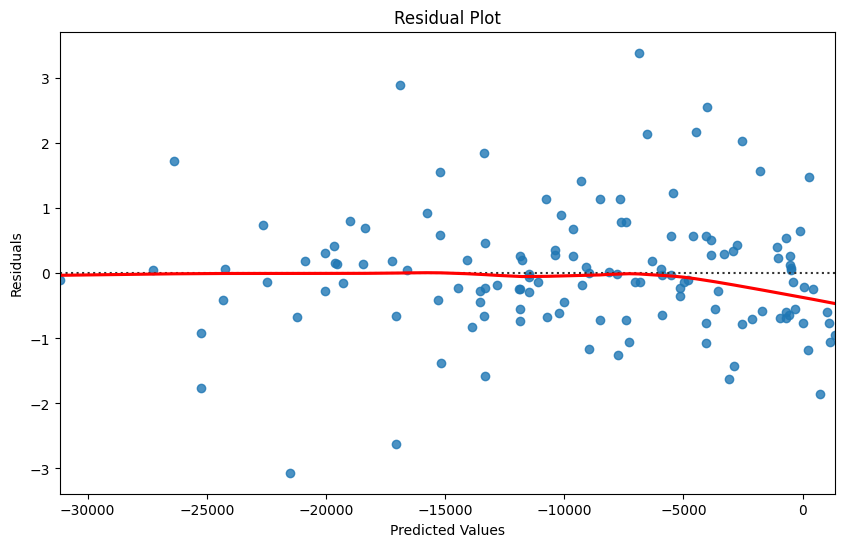

In [13]:
residuals = model.resid

# Residual plot (to check for homoscedasticity)
plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(X_train), y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Testar ta bort kolumnen med hög P-värde 

In [14]:
# Väljer features som ska användas
X = df_cleaned[["Year","Kms_Driven", "Present_Price", "Fuel_Type", "Seller_Type", "Transmission", "Owner"]]

# Väljer target
y = df_cleaned["Selling_Price"]


# Splittar dataset till test och train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Scalar datan både träning och test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Definerer modellen
linear_regressor = LinearRegression()

#Använder modellen på train
linear_regressor.fit(X_train_scaled, y_train)


#Definerer modellen
model = sm.OLS(y_train, X_train_scaled).fit()
print(model.summary())


#Förutsäger med test data i modellen
y_pred = linear_regressor.predict(X_test_scaled)


#Information om evaluering
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.349
Model:                            OLS   Adj. R-squared (uncentered):              0.329
Method:                 Least Squares   F-statistic:                              17.53
Date:                Fri, 13 Sep 2024   Prob (F-statistic):                    1.52e-11
Time:                        08:55:15   Log-Likelihood:                         -353.53
No. Observations:                 135   AIC:                                      715.1
Df Residuals:                     131   BIC:                                      726.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [15]:
# Split your data into numerical and categorical features
numerical_features = ["Year", "Kms_Driven", "Present_Price"]
categorical_features = ["Fuel_Type", "Seller_Type", "Transmission", "Owner"]

# Scaling numerical features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df_cleaned[numerical_features])

# Encoding categorical features with OneHotEncoder
encoder = OneHotEncoder(drop='first', handle_unknown="ignore", sparse=False)
X_cat_encoded = encoder.fit_transform(df_cleaned[categorical_features])

# Combine the scaled numerical features with encoded categorical features
X_processed = np.hstack((X_num_scaled, X_cat_encoded))

# Target variable
y = df_cleaned["Selling_Price"]

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# Defining and fitting the linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Model summary with OLS
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

# Making predictions on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.628
Model:                            OLS   Adj. R-squared (uncentered):              0.617
Method:                 Least Squares   F-statistic:                              55.39
Date:                Fri, 13 Sep 2024   Prob (F-statistic):                    2.91e-27
Time:                        08:55:15   Log-Likelihood:                         -315.64
No. Observations:                 135   AIC:                                      639.3
Df Residuals:                     131   BIC:                                      650.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [19]:
new_data = {
    "Year": 20,
    "Present_Price": 5.0,
    "Kms_Driven": 100000,
    "Fuel_Type": 0,         
    "Seller_Type": 1,       
    "Transmission": 0,     
    "Owner": 1              
}

new_data_df = pd.DataFrame([new_data])
new_data_num_scaled = scaler.transform(new_data_df[numerical_features])
new_data_cat_encoded = encoder.transform(new_data_df[categorical_features])
new_data_processed = np.hstack((new_data_num_scaled, new_data_cat_encoded))


predicted_selling_price = linear_regressor.predict(new_data_processed)
print(f"Predicted Selling Price: {predicted_selling_price[0]:.2f}")




Predicted Selling Price: -622.70
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=53574253-4d79-471e-89ad-67cba21e8970' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>